In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)
np.random.seed(42)
tf.random.set_seed(42)
X_train.shape
model = keras.models.Sequential([keras.layers.Dense(30, activation='relu',input_shape=[8]),keras.layers.Dense(30, activation='relu'), keras.layers.Dense(1)])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.SGD(lr=1e-3), metrics=['mae'])
model_history = model.fit(X_train, y_train,batch_size=1, epochs= 20, validation_data=(X_valid, y_valid))

Epoch 1/20
11610/11610 [==============================] - 9s 816us/step - loss: 0.2872 - mae: 0.3681 - val_loss: 0.3983 - val_mae: 0.4255
Epoch 2/20
11610/11610 [==============================] - 10s 827us/step - loss: 0.2847 - mae: 0.3672 - val_loss: 0.3803 - val_mae: 0.4238
Epoch 3/20
11610/11610 [==============================] - 10s 841us/step - loss: 0.2828 - mae: 0.3650 - val_loss: 0.3807 - val_mae: 0.4310
Epoch 4/20
11610/11610 [==============================] - 10s 830us/step - loss: 0.2824 - mae: 0.3647 - val_loss: 0.3769 - val_mae: 0.4300
Epoch 5/20
11610/11610 [==============================] - 10s 819us/step - loss: 0.2814 - mae: 0.3640 - val_loss: 0.3898 - val_mae: 0.4414
Epoch 6/20
11610/11610 [==============================] - 10s 843us/step - loss: 0.2797 - mae: 0.3630 - val_loss: 0.3885 - val_mae: 0.4292
Epoch 7/20
11610/11610 [==============================] - 10s 850us/step - loss: 0.2795 - mae: 0.3627 - val_loss: 0.3819 - val_mae: 0.4371
Epoch 8/20
11610/11610 [====

162/162 [==============================] - 0s 938us/step - loss: 0.4206 - mae: 0.4514


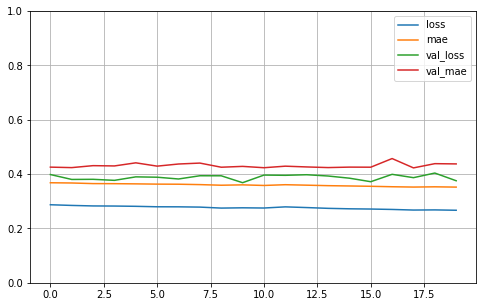

In [11]:
mae_test = model.evaluate(X_test, y_test)
model_history.history
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
X_new = X_test[:3]#insert new datasets in place of this
y_pred = model.predict_classes(X_new)
print(y_pred)
print(y_test[:3])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1]
 [1]
 [1]]
[0.477   0.458   5.00001]
